#Scientific Libraries in Python
##Albert DeFusco

##NumPy Array
* Fast mathematical operations
  - Homogeneous data types
  - Contiguous memory layout
* Fixed length but mutable
  - no append or prepend
* Multidimensional
  - row-major
* Numpy data types
  - http://docs.scipy.org/doc/numpy/user/basics.types.html

In [11]:
import numpy as np
x = np.array( [[1.,2.,3], [4.,5.,6.]] )
n = np.array( [[1,2,3], [4,5,6]] )
s = np.array( n, dtype=np.int32)

In [12]:
print "x is ",x.dtype
print "n is ",n.dtype
print "s is ",s.dtype

x is  float64
n is  int64
s is  int32


##Array slicing
* Just like lists
* Slices are views and not copied

In [2]:
import numpy as np
x = np.arange(10)
print x

[0 1 2 3 4 5 6 7 8 9]


In [20]:
#single values
print x[0],x[4],x[-1]

0 4 9


In [18]:
#ranges
print x[0:3]
print x[1:8:2]
print type(x[1:8:2])

[0 1 2]
[1 3 5 7]
<type 'numpy.ndarray'>


In [19]:
#reverse array
print x[::-1]

[9 8 7 6 5 4 3 2 1 0]


##Array slices
* Slices are views not copies

In [57]:
y = x[1:8:2]
y += 10
print y
print x

[41 43 45 47]
[ 0 41  2 43  4 45  6 47  8  9]


##Array operations
* For loops are slow
  - Array operations are auto-vectorized
  - NumPy built-in operations make use of compiled code
* Math operations are element wise (+, -, *, /, etc.)

In [23]:
x = np.arange(10)
print x
print x+1
print x*2
print x**2

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[ 0  2  4  6  8 10 12 14 16 18]
[ 0  1  4  9 16 25 36 49 64 81]


##Array operations
* Operations between same sized and shaped array are *element wise*
  - We'll see dot products later

In [35]:
x = np.arange(10)
y = np.arange(0,100,10)
print x
print y

[0 1 2 3 4 5 6 7 8 9]
[ 0 10 20 30 40 50 60 70 80 90]


In [51]:
print x+y
print x*y

[ 0 11 22 33 44 55 66 77 88 99]
[  0  10  40  90 160 250 360 490 640 810]


##Array operations
* Conditional operations return conditional arrays

In [53]:
z = y>50
print z
print type(z),z.dtype

[False False False False False False  True  True  True  True]
<type 'numpy.ndarray'> bool


* masking makes a copy

In [79]:
x = np.arange(10)
print z
print z.shape
y = x[ x > 5 ]
y += 10
print y
print x

[[1, 2, 3] [4, 5]]
(2,)
[16 17 18 19]
[0 1 2 3 4 5 6 7 8 9]


##Array operations
* Convert between dimensions with `shape`

In [42]:
a = np.arange(9).reshape(3,3)
b = np.arange(0,90,10).reshape(3,3)
print a
print b

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0 10 20]
 [30 40 50]
 [60 70 80]]


In [63]:
#both arrays must be the same shape
print a+b
print a*b
print a.sum()
print a.cumsum()

[[ 0 11 22]
 [33 44 55]
 [66 77 88]]
[[  0  10  40]
 [ 90 160 250]
 [360 490 640]]
36
[ 0  1  3  6 10 15 21 28 36]


##Array operations

In [61]:
np.arange(5)+np.arange(2)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

##Array operations
* `sum()` Sum of all elements

* `cumsum()` Cumulative sum (returns an array)

* `prod()` Product of all elements

* `cumprod()` Cumulative product (returns an array)

##Functions of arrays
* When arrays are arguements, the operations are already vectorized
* Use `vectorize` when in doubt

In [80]:
def myAdd(a,b):
    return (a + b)**2

vec_myAdd = vectorize(myAdd) #just to be safe

##Things I skipped
* Broadcasting

* Fancy indexing

* New axis

##Compute &pi;
$$\pi = 2\prod^{\infty}_{i=1}\frac{4i^2}{4i^2-1}$$

List-based function

In [48]:
def piLoop(n):
  pi = 2.
  for i in range(1,n):
    temp=i**2*4.
    pi *= temp / (temp-1)
  print pi

In [49]:
%timeit piLoop(10000000)

3.14159257508
3.14159257508
3.14159257508
3.14159257508
1 loops, best of 3: 3.11 s per loop


Let's switch to iPython Notebooks

##Array creators
* `np.arange(start,stop,increment)`

* `np.linspace(start,stop,nElments)`

* `np.zeros(nRows,nColumns)`

* `np.ones(nRows,nColumns)`

* `np.fill(number)`

* http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html


##Matrices
* Dot product `a.dot(b)`

* Transpost `a.T`

* `np.matrix` for 2D only

* See `scipy.linalg` for useful tools

In [83]:
A = np.matrix('1,2 ; 3,4')
print A
print type(A),A.dtype

[[1 2]
 [3 4]]
<class 'numpy.matrixlib.defmatrix.matrix'> int64


In [90]:
B = np.matrix('2,0 ; 0,2')
print A*B
a = np.array([[1,2],[3,4]]).reshape(2,2)
b = np.array([[2,0],[0,2]]).reshape(2,2)
print a.dot(b)

[[2 4]
 [6 8]]
[[2 4]
 [6 8]]


##Plotting
###The Easy Way

Populating the interactive namespace from numpy and matplotlib


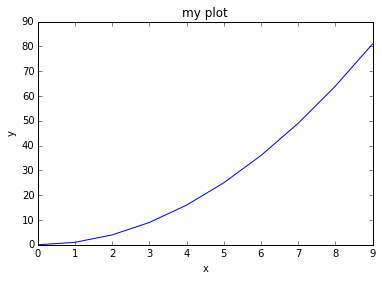

In [8]:
%pylab inline
x = np.arange(10)
y = x**2
plot(x,y)
title("my plot")
xlabel('x')
ylabel('y')

##Multiple series

Populating the interactive namespace from numpy and matplotlib


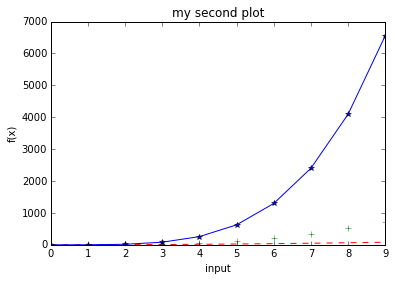

In [12]:
%pylab inline
x = np.arange(10)
y1 = x**2
y2 = x**3
y3 = x**4
plot(x,y1,'r--')
plot(x,y2,'g+')
plot(x,y3,'b*-')
title("my second plot")
xlabel('input')
ylabel('f(x)')

##Subplots
`subplot(nRows,nColumns,thisPlot)`

Populating the interactive namespace from numpy and matplotlib


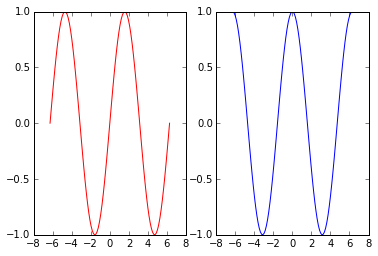

In [16]:
%pylab inline
x = np.linspace(-2.*np.pi,2.*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)
subplot(1,2,1)
plot(x,y1,'r')
subplot(1,2,2)
plot(x,y2,'b')

##SciPy
Collection of mathematical functions useful in scientific computing
<table>
<tr><td><b>Subpackage</b></td> 	<td><b>Description</b></td></tr>
<tr><td>cluster</td> 	<td>Clustering algorithms</td><tr>
<tr><td>constants</td> 	<td>Physical and mathematical constants</td><tr>
<tr><td>fftpack</td> 	<td>Fast Fourier Transform routines</td><tr>
<tr><td>integrate</td> 	<td>Integration and ordinary differential equation solvers</td><tr>
<tr><td>interpolate</td> 	<td>Interpolation and smoothing splines</td><tr>
<tr><td>io</td> 	<td>Input and Output</td><tr>
<tr><td>linalg</td> 	<td>Linear algebra</td><tr>
<tr><td>ndimage</td> 	<td>N-dimensional image processing</td><tr>
<tr><td>odr</td> 	<td>Orthogonal distance regression</td><tr>
<tr><td>optimize</td> 	<td>Optimization and root-finding routines</td><tr>
<tr><td>signal</td> 	<td>Signal processing</td><tr>
<tr><td>sparse</td> 	<td>Sparse matrices and associated routines</td><tr>
<tr><td>spatial</td> 	<td>Spatial data structures and algorithms</td><tr>
<tr><td>special</td> 	<td>Special functions</td><tr>
<tr><td>stats</td> 	<td>Statistical distributions and functions</td><tr>
<tr><td>weave</td> 	<td>C/C++ integration</td><tr>
</table>
